# DATA 335 - Winter 2025 - Lab 6

## Logistic regression issues

2025.03.11, 14:00-15:50, MS 521

In [91]:
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.special import expit
from sklearn.metrics import log_loss
import bambi as bmb
import arviz as az

In [10]:
X, y = load_iris(return_X_y=True)

I = np.logical_or(y == 0, y == 1)
X = X[I]
y = y[I]

In [ ]:
model = LogisticRegression(penalty=None)
model.fit(X, y)
accuracy_score(y, model.predict(X))

1.0

In [23]:
fit = sm.Logit(y, X).fit()
fit.summary()

         Current function value: 0.000009
         Iterations: 35


/Users/mgreenbe/DATA335W2025/.venv/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mgreenbe/DATA335W2025/.venv/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mgreenbe/DATA335W2025/.venv/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mgreenbe/DATA335W2025/.venv/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identif

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Mon, 10 Mar 2025   Pseudo R-squ.:                   1.000
Time:                        12:36:56   Log-Likelihood:            -0.00091251
converged:                      False   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 7.471e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.9877     78.708     -0.025      0.980    -156.252     152.276
x2            -4.6555     99.388     -0.047      0.963    -199.453     190.142
x3             5.1771    169.916      0.030      0.976    -327.852     338.206
x4            16.2428    383.926      0.042      0.966    -736.238     768.723
==============================================================================

Possibly complete quasi-separation: A fraction 0.97 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Show that
$$
-(y\log p + (1 - y)\log(1 - p))
$$
whenever $0 < p < 1$ and $y\in\{0,1\}$, explain why

In [22]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Mon, 10 Mar 2025   Pseudo R-squ.:                   1.000
Time:                        12:36:47   Log-Likelihood:            -1.9072e-10
converged:                      False   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 7.464e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -8.3514   4.77e+06  -1.75e-06      1.000   -9.34e+06    9.34e+06
x2           -12.3612   8.06e+06  -1.53e-06      1.000   -1.58e+07    1.58e+07
x3            22.5487   3.25e+06   6.94e-06      1.000   -6.37e+06    6.37e+06
x4            25.7403   4.94e+06   5.21e-06      1.000   -9.67e+06    9.67e+06
==============================================================================

Complete Separation: The results show that there iscomplete separation or perfect prediction.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

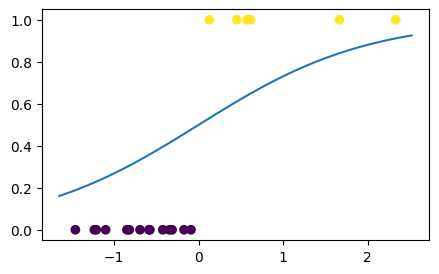

In [50]:
n = 20
rng = np.random.default_rng()
x = rng.normal(size=n)
X = x.reshape(-1, 1)
y = x > 0

plt.figure(figsize=(5, 3))
plt.scatter(x, y, c=y)
u = np.linspace(*plt.xlim(), 100)
plt.plot(u, expit(u))

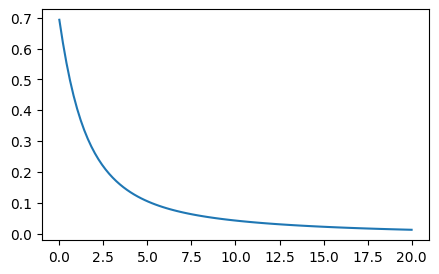

In [ ]:
plt.figure(figsize=(5, 3))
cs = np.linspace(0, 20, 100)
plt.plot(cs, [log_loss(y, expit(c * x)) for c in cs])

$$
L(c) = \sum_i\left(y_i\log\sigma(cx_i) + (1 - y_i)\log(1 - \sigma(cx_i))\right)
$$

$$
y_i = 0\Longleftrightarrow x_i < 0,\qquad
y_i = 1\Longleftrightarrow x_i > 0
$$

$$
L(c) = \sum_{i\,:\,x_i > 0} \log\sigma(cx_i) + \sum_{i\,:\,x_i < 0} \log(1 - \sigma(cx_i))
$$

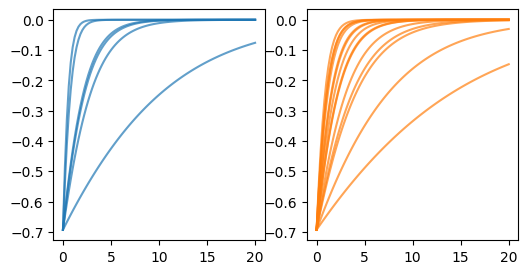

In [ ]:
fit, (a0, a1) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
for i in range(n):
    if x[i] > 0:
        a0.plot(cs, np.log(expit(cs * x[i])), "C0", alpha=0.7)
    else:
        a1.plot(cs, np.log(1 - expit(cs * x[i])), "C1", alpha=0.7)

Explain why
$$
\lim_{u\to\infty} \log\sigma(u) = 0.
$$

Conclude that if $x > 0$, then
$$
\lim_{c\to\infty} \log\sigma(cx) = 0.
$$

Explain why
$$
\lim_{u\to-\infty} \log(1 - \sigma(u)) = 0.
$$

Conclude that if $x < 0$, then
$$
\lim_{c\to\infty} \log(1 - \sigma(cx)) = 0.
$$

Conclude that
$$
\lim_{c\to\infty} L = 0
$$

$$
\log\sigma(u) = -\log(1 + e^{-u})
$$

In [83]:
X, y = load_iris(return_X_y=True)

I = np.logical_or(y == 0, y == 1)
X = X[I]
y = y[I]

model = LogisticRegression(penalty=None, fit_intercept=False)
model.fit(X, y)
accuracy_score(y, model.predict(X))

v = model.coef_.squeeze()

assert np.all(X[y == 0] @ v < 0)
assert np.all(X[y == 1] @ v > 0)

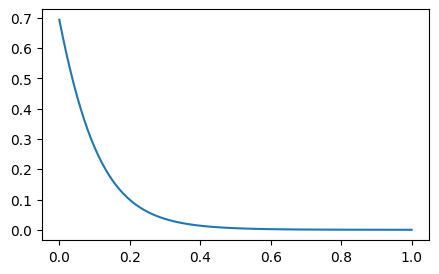

In [ ]:
cs = np.linspace(0, 1, 100)
plt.figure(figsize=(5, 3))
plt.plot(cs, [log_loss(y, expit(X @ (c * v))) for c in cs])

For a 4-dimensional coefficient vector $v$, let
$$
L(v) = \sum_i\left(y_i\log\sigma(v\cdot x_i) + (1 - y_i)\log(1 - \sigma(v\cdot x_i))\right)
$$

Let $v_0$ be the coefficient vector found in fitting a logistic regression model to classes 0 and 1 of the iris dataset.
$$
y_i = 0\Longleftrightarrow v_0\cdot x_i < 0,\qquad
y_i = 1\Longleftrightarrow v_0\cdot x_i > 0.
$$

Thus,
$$
L(v_0) = \sum_{i\,:\,v_0\cdot x_i > 0} \log\sigma(v_0\cdot x_i) + \sum_{i\,:\,v_0\cdot x_i < 0} \log(1 - \sigma(v_0\cdot x_i))
$$

Show that
$$
\lim_{c\to\infty} L(cv_0) = 0.
$$

In [ ]:
X, y = load_iris(return_X_y=True, as_frame=True)

X["label"] = y
I = np.logical_or(y == 0, y == 1)
X = X.loc[I]
X = X.rename(
    columns={
        "sepal length (cm)": "sl",
        "sepal width (cm)": "sw",
        "petal length (cm)": "pl",
        "petal width (cm)": "pw",
    }
)
X

,sl,sw,pl,pw,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [149]:
model = bmb.Model("label ~ sl + sw + pl + pw", X, family="bernoulli")
model

       Formula: label ~ sl + sw + pl + pw
        Family: bernoulli
          Link: p = logit
  Observations: 100
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.5)
            sl ~ Normal(mu: 0.0, sigma: 1.5662)
            sw ~ Normal(mu: 0.0, sigma: 2.0993)
            pl ~ Normal(mu: 0.0, sigma: 0.6933)
            pw ~ Normal(mu: 0.0, sigma: 1.7783)

In [100]:
fit = model.fit()

Modeling the probability that label==1
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, sl, sw, pl, pw]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [101]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-5.145,6.586,-17.641,6.552,0.097,0.075,4604.0,3045.0,1.0
sl,1.441,1.218,-0.842,3.670,0.019,0.015,3926.0,2990.0,1.0
sw,-2.726,1.360,-5.418,-0.271,0.024,0.018,3307.0,2600.0,1.0
pl,1.217,0.563,0.142,2.249,0.010,0.007,3427.0,2736.0,1.0
pw,3.034,1.410,0.431,5.673,0.025,0.018,3112.0,2275.0,1.0


In [103]:
model.predict(fit, data=X)

In [112]:
accuracy_score(X["label"], fit.posterior["p"].mean(axis=(0, 1)) > 0.5)

1.0

In [115]:
np.abs(fit.posterior["p"].mean(axis=(0, 1)) - 0.5).min()

<xarray.DataArray 'p' ()> Size: 8B
array(0.35416561)

In [145]:
X, y = load_iris(return_X_y=True)

I = np.logical_or(y == 0, y == 1)
X = X[I]
y = y[I]

model = LogisticRegression(C=0.00001)
model.fit(X, y)
accuracy_score(y, model.predict(X))

1.0

In [150]:
model = bmb.Model("label ~ sl + sw + pl + pw", X, family="bernoulli")
model

       Formula: label ~ sl + sw + pl + pw
        Family: bernoulli
          Link: p = logit
  Observations: 100
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.5)
            sl ~ Normal(mu: 0.0, sigma: 1.5662)
            sw ~ Normal(mu: 0.0, sigma: 2.0993)
            pl ~ Normal(mu: 0.0, sigma: 0.6933)
            pw ~ Normal(mu: 0.0, sigma: 1.7783)

In [165]:
sigma = 0.01
priors = {
    "Intercept": bmb.Prior("Normal", mu=0, sigma=0.1),
    "sl": bmb.Prior("Normal", mu=0, sigma=sigma),
    "sw": bmb.Prior("Normal", mu=0, sigma=sigma),
    "pl": bmb.Prior("Normal", mu=0, sigma=sigma),
    "pw": bmb.Prior("Normal", mu=0, sigma=sigma),
}

In [166]:
model = bmb.Model("label ~ sl + sw + pl + pw", X, family="bernoulli", priors=priors)
model

       Formula: label ~ sl + sw + pl + pw
        Family: bernoulli
          Link: p = logit
  Observations: 100
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 0.1)
            sl ~ Normal(mu: 0.0, sigma: 0.01)
            sw ~ Normal(mu: 0.0, sigma: 0.01)
            pl ~ Normal(mu: 0.0, sigma: 0.01)
            pw ~ Normal(mu: 0.0, sigma: 0.01)

In [167]:
fit = model.fit()

Modeling the probability that label==1
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, sl, sw, pl, pw]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [168]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.025,0.115,-0.237,0.198,0.001,0.002,6930.0,3045.0,1.0
sl,0.002,0.010,-0.017,0.022,0.000,0.000,5738.0,3353.0,1.0
sw,-0.002,0.010,-0.020,0.018,0.000,0.000,7133.0,3450.0,1.0
pl,0.007,0.010,-0.012,0.026,0.000,0.000,6544.0,3285.0,1.0
pw,0.003,0.010,-0.015,0.022,0.000,0.000,6963.0,3585.0,1.0


In [169]:
model.predict(fit, data=X)
accuracy_score(X["label"], fit.posterior["p"].mean(axis=(0, 1)) > 0.5)

1.0